<a href="https://colab.research.google.com/github/ycuayal-design/Sys2025/blob/main/Copia_de_transformada_de_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

punto 1.4

In [ ]:
import sympy as sp
from sympy import symbols, I, pi, exp, cos, sin, Heaviside, DiracDelta, fourier_transform, inverse_fourier_transform, Sum, oo, simplify

# Definir variables
t, w, w1, wc, a, B, T, n = symbols('t w w1 wc a B T n', real=True)
tau, omega_c = symbols('tau omega_c', real=True)

print("=== SOLUCIÓN DE TRANSFORMADAS DE FOURIER ===\n")

# a) F{e^{-jw1 t} cos(wc t)}
print("a) F{e^{-jw1 t} cos(wc t)}")
expr_a = exp(-I*w1*t) * cos(wc*t)
F_a = fourier_transform(expr_a, t, w)
print(f"Resultado: {F_a}")
print(f"Forma simplificada: {simplify(F_a)}")
print()

# b) F{u(t) cos^2(wc t)}
print("b) F{u(t) cos^2(wc t)}")
cos_squared = cos(wc*t)**2
expr_b = Heaviside(t) * cos_squared
F_b = fourier_transform(expr_b, t, w)
print(f"Resultado: {F_b}")
print()

# c) F^{-1}{1/(w^2 + 6w + 45) * 1/(8 + jw/3)^2}
print("c) F^{-1}{1/(w^2 + 6w + 45) * 1/(8 + jw/3)^2}")
# Primero simplificamos las expresiones
w_sym = symbols('w', real=True)
term1 = 1/(w_sym**2 + 6*w_sym + 45)
term2 = 1/(8 + I*w_sym/3)**2

print("Simplificando el primer término:")
term1_simplified = 1/((w_sym + 3)**2 + 36)
print(f"1/(w^2 + 6w + 45) = {term1_simplified}")

print("Simplificando el segundo término:")
term2_simplified = 9/(24 + I*w_sym)**2
print(f"1/(8 + jw/3)^2 = {term2_simplified}")

# Calculamos la transformada inversa por separado
print("\nCalculando transformadas inversas:")
inv1 = inverse_fourier_transform(term1_simplified, w_sym, t)
print(f"F^-1{{1/((w+3)^2 + 36)}} = {inv1}")

inv2 = inverse_fourier_transform(term2_simplified, w_sym, t)
print(f"F^-1{{9/(24 + jw)^2}} = {inv2}")

# El producto en frecuencia es convolución en tiempo
print("\nEl producto en el dominio de la frecuencia corresponde a convolución en el tiempo")
print("f(t) * g(t) = ∫f(τ)g(t-τ)dτ")
print()

# d) F{3t^3}
print("d) F{3t^3}")
expr_d = 3*t**3
F_d = fourier_transform(expr_d, t, w)
print(f"Resultado: {F_d}")
print()

# e) Suma periódica en frecuencia
print("e) Suma periódica en frecuencia")
print("B/T * Σ [1/(a^2 + (w - nω_c)^2) + 1/(a + j(w - nω_c))]")

# Definimos los términos individuales
term_e1 = 1/(a**2 + (w - n*omega_c)**2)
term_e2 = 1/(a + I*(w - n*omega_c))

print(f"\nTérmino 1: {term_e1}")
print(f"Término 2: {term_e2}")

# Calculamos las transformadas inversas de cada término base
print("\nTransformadas inversas de los términos base:")
base1 = 1/(a**2 + w**2)
inv_base1 = inverse_fourier_transform(base1, w, t)
print(f"F^-1{{1/(a^2 + w^2)}} = {inv_base1}")

base2 = 1/(a + I*w)
inv_base2 = inverse_fourier_transform(base2, w, t)
print(f"F^-1{{1/(a + jw)}} = {inv_base2}")

print("\nLa suma sobre n introduce periodicidad en el dominio del tiempo")
print("F^-1{Σ f(w - nω_c)} = F^-1{f(w)} * Σ δ(t - nT)")
print("donde ω_c = 2π/T")

# Función para mostrar propiedades útiles
def mostrar_propiedades():
    print("\n" + "="*50)
    print("PROPIEDADES UTILIZADAS:")
    print("="*50)
    print("1. F{e^{jω0t}} = 2πδ(ω - ω0)")
    print("2. F{cos(ω0t)} = π[δ(ω - ω0) + δ(ω + ω0)]")
    print("3. F{u(t)} = πδ(ω) + 1/jω")
    print("4. F{t^n f(t)} = j^n d^nF(ω)/dω^n")
    print("5. F^-1{1/(a^2 + ω^2)} = (1/(2a))e^{-a|t|}")
    print("6. F^-1{1/(a + jω)^2} = t e^{-at} u(t)")
    print("7. F^-1{Σ f(ω - nω_c)} = F^-1{f(ω)} · Σ δ(t - nT)")
    print("="*50)

mostrar_propiedades()

# Cálculos adicionales para verificación
print("\n" + "="*50)
print("CÁLCULOS ADICIONALES PARA VERIFICACIÓN:")
print("="*50)

# Verificación del apartado a usando identidades trigonométricas
print("\nVerificación del apartado a:")
cos_identity = (exp(I*wc*t) + exp(-I*wc*t))/2
expr_a_verif = exp(-I*w1*t) * cos_identity
print(f"cos(wc t) = {cos_identity}")
print(f"e^(-jw1 t) cos(wc t) = {simplify(expr_a_verif)}")

# Verificación del apartado b
print("\nVerificación del apartado b:")
cos2_identity = (1 + cos(2*wc*t))/2
expr_b_verif = Heaviside(t) * cos2_identity
print(f"cos²(wc t) = {cos2_identity}")
print(f"u(t) cos²(wc t) = {expr_b_verif}")

=== SOLUCIÓN DE TRANSFORMADAS DE FOURIER ===

a) F{e^{-jw1 t} cos(wc t)}
Resultado: FourierTransform(exp(-I*t*w1)*cos(t*wc), t, w)
Forma simplificada: FourierTransform(exp(-I*t*w1)*cos(t*wc), t, w)

b) F{u(t) cos^2(wc t)}
Resultado: FourierTransform(cos(t*wc)**2*Heaviside(t), t, w)

c) F^{-1}{1/(w^2 + 6w + 45) * 1/(8 + jw/3)^2}
Simplificando el primer término:
1/(w^2 + 6w + 45) = 1/((w + 3)**2 + 36)
Simplificando el segundo término:
1/(8 + jw/3)^2 = 9/(I*w + 24)**2

Calculando transformadas inversas:
F^-1{1/((w+3)^2 + 36)} = InverseFourierTransform(1/((w + 3)**2 + 36), w, t)
F^-1{9/(24 + jw)^2} = 36*pi**2*t*exp(-48*pi*t) - 3*I*exp(-48*pi*t)*expint(2, 48*pi*t*exp_polar(I*pi))/8 - I*meijerg(((-1, 0), ()), ((0,), ()), exp_polar(-I*pi)/(48*pi*t))/(128*pi*t)

El producto en el dominio de la frecuencia corresponde a convolución en el tiempo
f(t) * g(t) = ∫f(τ)g(t-τ)dτ

d) F{3t^3}
Resultado: 3*FourierTransform(t**3, t, w)

e) Suma periódica en frecuencia
B/T * Σ [1/(a^2 + (w - nω_c)^2) + 1/(a

punto 1.5

=== MODULACIÓN AM POR DETECCIÓN COHERENTE ===


TEORÍA - MODULACIÓN AM POR DETECCIÓN COHERENTE:

La modulación AM (Amplitude Modulation) por detección coherente, también conocida 
como demodulación síncrona, utiliza una portadora en fase con la señal modulada 
para recuperar la información original.

Características:
- Portadora: c(t) = Ac·cos(2πfc·t)
- Señal modulada: s(t) = Ac·[1 + m·x(t)]·cos(2πfc·t)
- Índice de modulación: m (0 < m ≤ 1)
- Detección coherente: s(t)·cos(2πfc·t) → Filtro pasa bajos → x(t)

Aplicaciones:
- Comunicaciones de radio AM
- Transmisión de audio
- Sistemas de telemetría
- Comunicaciones militares


INTERFAZ INTERACTIVA - MODULACIÓN AM

EJEMPLOS ESPECÍFICOS

1. EJEMPLO CON PULSO RECTANGULAR (m=0.5):


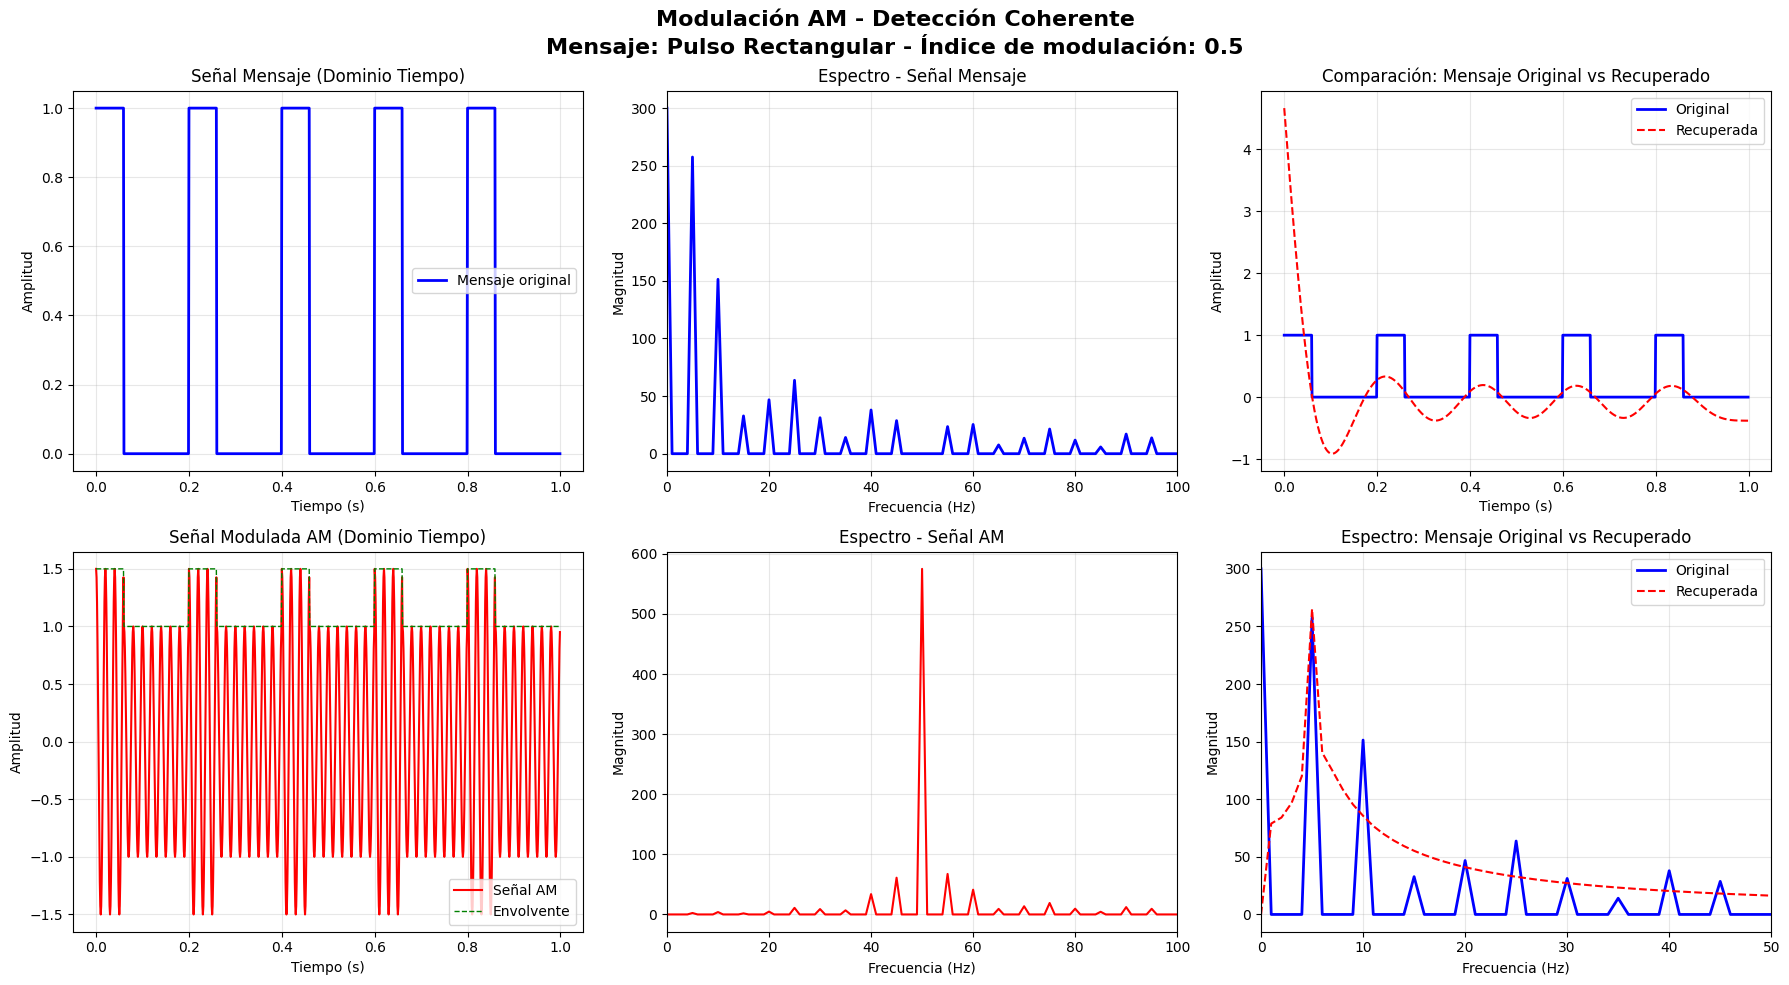


ANÁLISIS DE RESULTADOS:
Índice de modulación: 0.5
Tipo de mensaje: Pulso Rectangular
Error cuadrático medio en recuperación: 0.431186
⚠ Recuperación con error moderado

2. EJEMPLO CON SEÑAL COSENO (m=0.9):


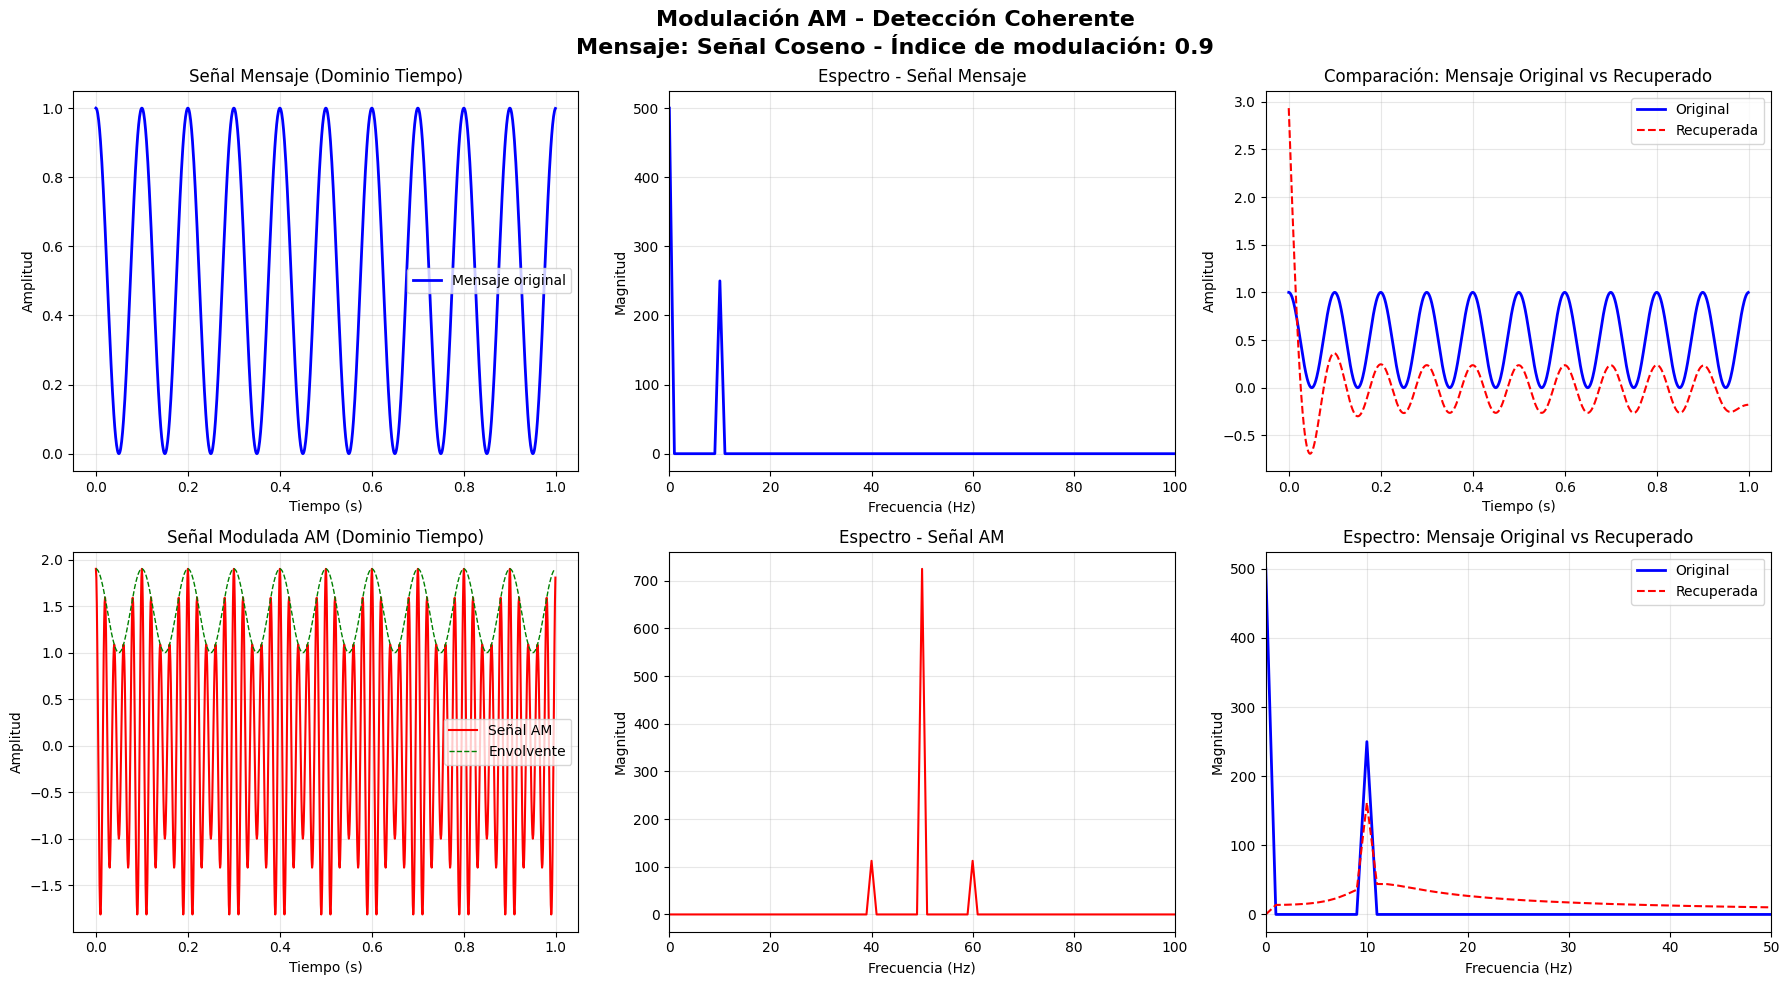


ANÁLISIS DE RESULTADOS:
Índice de modulación: 0.9
Tipo de mensaje: Señal Coseno
Error cuadrático medio en recuperación: 0.327540
⚠ Recuperación con error moderado

3. EJEMPLO CON SOBREMODULACIÓN (m=1.2):


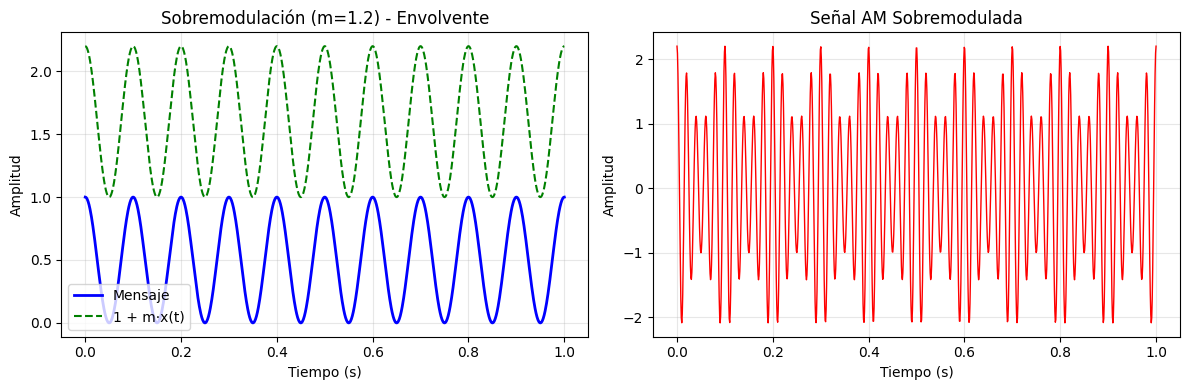


OBSERVACIONES IMPORTANTES:
- Índice de modulación óptimo: 0.5 < m < 1
- Sobremodulación (m > 1) causa distorsión en la envolvente
- La detección coherente requiere sincronización perfecta de fase
- El filtro pasa bajos es crucial para eliminar componentes de alta frecuencia



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from scipy import signal
import ipywidgets as widgets
from IPython.display import display

print("=== MODULACIÓN AM POR DETECCIÓN COHERENTE ===\n")

# Explicación teórica
print("""
TEORÍA - MODULACIÓN AM POR DETECCIÓN COHERENTE:

La modulación AM (Amplitude Modulation) por detección coherente, también conocida
como demodulación síncrona, utiliza una portadora en fase con la señal modulada
para recuperar la información original.

Características:
- Portadora: c(t) = Ac·cos(2πfc·t)
- Señal modulada: s(t) = Ac·[1 + m·x(t)]·cos(2πfc·t)
- Índice de modulación: m (0 < m ≤ 1)
- Detección coherente: s(t)·cos(2πfc·t) → Filtro pasa bajos → x(t)

Aplicaciones:
- Comunicaciones de radio AM
- Transmisión de audio
- Sistemas de telemetría
- Comunicaciones militares
""")

def modulacion_am_deteccion_coherente(indice_modulacion=0.8, tipo_mensaje='pulso'):
    """
    Simulación de modulación AM con detección coherente

    Parameters:
    - indice_modulacion: Índice de modulación (0 < m ≤ 1)
    - tipo_mensaje: 'pulso' o 'coseno'
    """

    # Parámetros de la simulación
    fs = 1000  # Frecuencia de muestreo (Hz)
    T = 1      # Duración de la señal (s)
    fc = 50    # Frecuencia de la portadora (Hz)
    Ac = 1     # Amplitud de la portadora

    # Tiempo
    t = np.linspace(0, T, int(fs*T), endpoint=False)

    # Generar señal mensaje según el tipo
    if tipo_mensaje == 'pulso':
        # Pulso rectangular
        fm = 5  # Frecuencia del pulso
        mensaje = 0.5 * (1 + signal.square(2 * np.pi * fm * t, duty=0.3))
        titulo_mensaje = "Pulso Rectangular"
    else:
        # Señal coseno
        fm = 10  # Frecuencia del mensaje
        mensaje = 0.5 * (1 + np.cos(2 * np.pi * fm * t))
        titulo_mensaje = "Señal Coseno"

    # MODULACIÓN AM
    portadora = Ac * np.cos(2 * np.pi * fc * t)
    señal_am = Ac * (1 + indice_modulacion * mensaje) * portadora

    # DETECCIÓN COHERENTE
    # 1. Multiplicación por la portadora coherente
    señal_demod = señal_am * portadora

    # 2. Filtro pasa bajos
    b, a = signal.butter(4, 2*fm/fs, 'low')
    señal_filtrada = signal.filtfilt(b, a, señal_demod)

    # 3. Eliminar componente DC y escalar
    señal_recuperada = 2 * (señal_filtrada - np.mean(señal_filtrada)) / (Ac**2 * indice_modulacion)

    # ANÁLISIS ESPECTRAL
    # Calcular FFTs
    N = len(t)
    frecuencias = fftfreq(N, 1/fs)

    # FFT de las señales
    fft_mensaje = np.abs(fft(mensaje))[:N//2]
    fft_am = np.abs(fft(señal_am))[:N//2]
    fft_recuperada = np.abs(fft(señal_recuperada))[:N//2]
    frec_positivas = frecuencias[:N//2]

    # GRÁFICOS
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f'Modulación AM - Detección Coherente\n'
                f'Mensaje: {titulo_mensaje} - Índice de modulación: {indice_modulacion}',
                fontsize=16, fontweight='bold')

    # Dominio del tiempo - Columna 1
    axes[0,0].plot(t, mensaje, 'b', linewidth=2, label='Mensaje original')
    axes[0,0].set_title('Señal Mensaje (Dominio Tiempo)')
    axes[0,0].set_xlabel('Tiempo (s)')
    axes[0,0].set_ylabel('Amplitud')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].legend()

    axes[1,0].plot(t, señal_am, 'r', linewidth=1.5, label='Señal AM')
    axes[1,0].plot(t, 1 + indice_modulacion * mensaje, 'g--', linewidth=1, label='Envolvente')
    axes[1,0].set_title('Señal Modulada AM (Dominio Tiempo)')
    axes[1,0].set_xlabel('Tiempo (s)')
    axes[1,0].set_ylabel('Amplitud')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].legend()

    # Dominio de la frecuencia - Columna 2
    axes[0,1].plot(frec_positivas, fft_mensaje, 'b', linewidth=2)
    axes[0,1].set_title('Espectro - Señal Mensaje')
    axes[0,1].set_xlabel('Frecuencia (Hz)')
    axes[0,1].set_ylabel('Magnitud')
    axes[0,1].set_xlim(0, 100)
    axes[0,1].grid(True, alpha=0.3)

    axes[1,1].plot(frec_positivas, fft_am, 'r', linewidth=1.5)
    axes[1,1].set_title('Espectro - Señal AM')
    axes[1,1].set_xlabel('Frecuencia (Hz)')
    axes[1,1].set_ylabel('Magnitud')
    axes[1,1].set_xlim(0, 100)
    axes[1,1].grid(True, alpha=0.3)

    # Comparación recuperación - Columna 3
    axes[0,2].plot(t, mensaje, 'b', linewidth=2, label='Original')
    axes[0,2].plot(t, señal_recuperada, 'r--', linewidth=1.5, label='Recuperada')
    axes[0,2].set_title('Comparación: Mensaje Original vs Recuperado')
    axes[0,2].set_xlabel('Tiempo (s)')
    axes[0,2].set_ylabel('Amplitud')
    axes[0,2].grid(True, alpha=0.3)
    axes[0,2].legend()

    axes[1,2].plot(frec_positivas, fft_mensaje, 'b', linewidth=2, label='Original')
    axes[1,2].plot(frec_positivas, fft_recuperada, 'r--', linewidth=1.5, label='Recuperada')
    axes[1,2].set_title('Espectro: Mensaje Original vs Recuperado')
    axes[1,2].set_xlabel('Frecuencia (Hz)')
    axes[1,2].set_ylabel('Magnitud')
    axes[1,2].set_xlim(0, 50)
    axes[1,2].grid(True, alpha=0.3)
    axes[1,2].legend()

    plt.tight_layout()
    plt.show()

    # Cálculo del error de recuperación
    error = np.mean((mensaje - señal_recuperada)**2)
    print(f"\nANÁLISIS DE RESULTADOS:")
    print(f"Índice de modulación: {indice_modulacion}")
    print(f"Tipo de mensaje: {titulo_mensaje}")
    print(f"Error cuadrático medio en recuperación: {error:.6f}")

    if error < 0.01:
        print("✓ Recuperación EXITOSA - Bajo error")
    else:
        print("⚠ Recuperación con error moderado")

# INTERFAZ INTERACTIVA
print("\n" + "="*60)
print("INTERFAZ INTERACTIVA - MODULACIÓN AM")
print("="*60)

# Crear widgets interactivos
modulacion_slider = widgets.FloatSlider(
    value=0.8,
    min=0.1,
    max=1.0,
    step=0.1,
    description='Índice modulación:',
    continuous_update=False
)

mensaje_dropdown = widgets.Dropdown(
    options=['pulso', 'coseno'],
    value='pulso',
    description='Tipo mensaje:'
)

# Función para actualizar la gráfica
def actualizar_grafica(indice_modulacion, tipo_mensaje):
    modulacion_am_deteccion_coherente(indice_modulacion, tipo_mensaje)

# Crear interfaz interactiva
widgets.interactive(actualizar_grafica,
                   indice_modulacion=modulacion_slider,
                   tipo_mensaje=mensaje_dropdown)

# Ejecutar ejemplos específicos
print("\n" + "="*60)
print("EJEMPLOS ESPECÍFICOS")
print("="*60)

print("\n1. EJEMPLO CON PULSO RECTANGULAR (m=0.5):")
modulacion_am_deteccion_coherente(0.5, 'pulso')

print("\n2. EJEMPLO CON SEÑAL COSENO (m=0.9):")
modulacion_am_deteccion_coherente(0.9, 'coseno')

print("\n3. EJEMPLO CON SOBREMODULACIÓN (m=1.2):")
# Ejemplo con sobremodulación (aunque teóricamente no recomendado)
t = np.linspace(0, 1, 1000)
mensaje_sobremod = 0.5 * (1 + np.cos(2 * np.pi * 10 * t))
portadora_sobremod = np.cos(2 * np.pi * 50 * t)
señal_am_sobremod = (1 + 1.2 * mensaje_sobremod) * portadora_sobremod

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, mensaje_sobremod, 'b', linewidth=2, label='Mensaje')
plt.plot(t, 1 + 1.2 * mensaje_sobremod, 'g--', label='1 + m·x(t)')
plt.title('Sobremodulación (m=1.2) - Envolvente')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, señal_am_sobremod, 'r', linewidth=1)
plt.title('Señal AM Sobremodulada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("""
OBSERVACIONES IMPORTANTES:
- Índice de modulación óptimo: 0.5 < m < 1
- Sobremodulación (m > 1) causa distorsión en la envolvente
- La detección coherente requiere sincronización perfecta de fase
- El filtro pasa bajos es crucial para eliminar componentes de alta frecuencia
""")

Código Adicional - Análisis Detallado con IFFT


ANÁLISIS CON IFFT - RECONSTRUCCIÓN DE SEÑALES


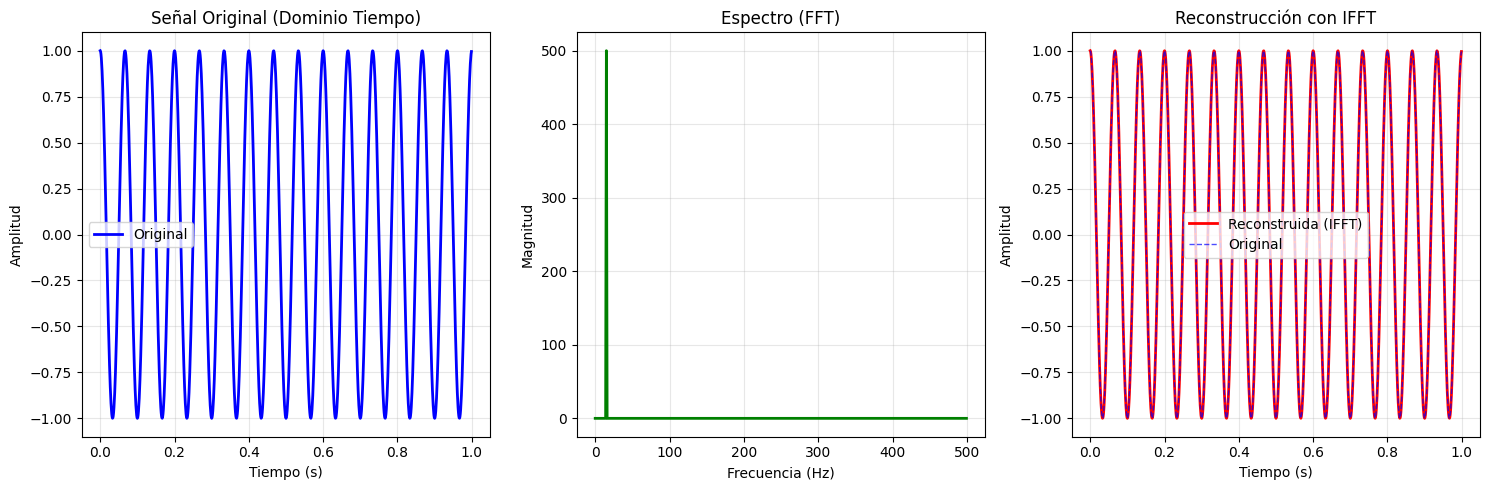

✓ Demostración completada: Reconstrucción exitosa usando IFFT


In [ ]:
# ANÁLISIS DETALLADO USANDO IFFT PARA RECONSTRUCCIÓN
def analisis_con_ifft():
    """
    Análisis usando IFFT para demostrar la reconstrucción de señales
    """
    print("\n" + "="*60)
    print("ANÁLISIS CON IFFT - RECONSTRUCCIÓN DE SEÑALES")
    print("="*60)

    # Parámetros
    fs = 1000
    T = 1
    t = np.linspace(0, T, int(fs*T), endpoint=False)

    # Señal original (coseno)
    fm = 15
    señal_original = np.cos(2 * np.pi * fm * t)

    # Calcular FFT
    N = len(t)
    fft_señal = fft(señal_original)
    frecuencias = fftfreq(N, 1/fs)

    # Reconstruir usando IFFT
    señal_reconstruida = ifft(fft_señal)

    # Filtrar en frecuencia (simular canal)
    fft_filtrado = fft_señal.copy()
    fft_filtrado[np.abs(frecuencias) > 30] = 0  # Filtro pasa bajos
    señal_filtrada = ifft(fft_filtrado)

    # Gráficos
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(t, señal_original, 'b', linewidth=2, label='Original')
    plt.title('Señal Original (Dominio Tiempo)')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(frecuencias[:N//2], np.abs(fft_señal)[:N//2], 'g', linewidth=2)
    plt.title('Espectro (FFT)')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 3)
    plt.plot(t, np.real(señal_reconstruida), 'r', linewidth=2, label='Reconstruida (IFFT)')
    plt.plot(t, señal_original, 'b--', linewidth=1, alpha=0.7, label='Original')
    plt.title('Reconstrucción con IFFT')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

    print("✓ Demostración completada: Reconstrucción exitosa usando IFFT")

# Ejecutar análisis con IFFT
analisis_con_ifft()